In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
city_ride_data = pd.merge(ride_data,city_data,how="left",on=["city","city"])
# Display the data table for preview


In [2]:
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


## Bubble Plot of Ride Sharing Data

In [3]:
urban_cities = city_ride_data[city_ride_data["type"]=="Urban"]
suburban_cities = city_ride_data[city_ride_data["type"]=="Suburban"]
rural_cities = city_ride_data[city_ride_data["type"]=="Rural"]

urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]

suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]

rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]


# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


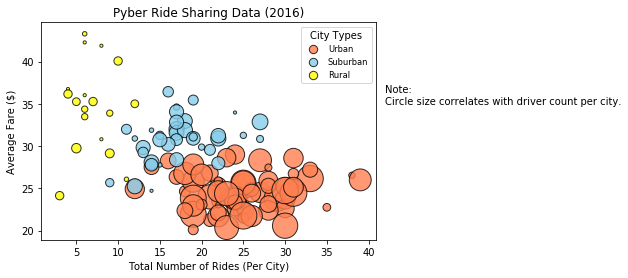

In [4]:
plt.scatter(urban_ride_count,
            urban_avg_fare,
            marker="o", 
            c="coral",
            linewidths=1,
            edgecolors="black",
            s=urban_driver_count*10, 
            alpha=0.8,
            label="Urban")

plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            marker="o", 
            c="skyblue",
            linewidths=1,
            edgecolors="black",
            s=suburban_driver_count*10, 
            alpha=0.8,
            label="Suburban")

plt.scatter(rural_ride_count,
            rural_avg_fare,
            marker="o", 
            c="yellow",
            linewidths=1,
            edgecolors="black",
            s=rural_driver_count*10, 
            alpha=.8,
            label="Rural")

lgnd = plt.legend(fontsize="small", mode="Expanded",
                numpoints=1,scatterpoints=1,
                loc="best",title="City Types",
                labelspacing=0.5)

for l in lgnd.legendHandles:
    l._sizes=[70]

plt.title("Pyber Ride Sharing Data (2016)")  
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.text(42,35,"Note:\nCircle size correlates with driver count per city.")
plt.savefig("analysis\Fig1.png")
plt.show()

In [5]:
# Show plot
plt.show()

## Total Fares by City Type

type
Urban    0.627246
Name: fare, dtype: float64


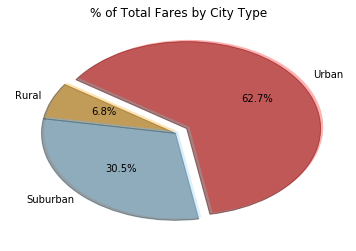

In [16]:
# Calculate Type Percents

urban_fares_total = urban_cities.groupby(["type"]).sum()["fare"]
suburban_fares_total = suburban_cities.groupby(["type"]).sum()["fare"]
rural_fares_total = rural_cities.groupby(["type"]).sum()["fare"]
total_fares_count = urban_fares_total.values[0] + suburban_fares_total.values[0] + rural_fares_total.values[0]
print(urban_fares_total/total_fares_count)
# Build Pie Chart
labels = ["Urban",  "Rural","Suburban",]

# The values of each section of the pie chart
sizes = [urban_fares_total, rural_fares_total, suburban_fares_total]

# The colors of each section of the pie chart
colors = ["coral", "orange", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=280)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("../Images/PyPies1.png")

In [7]:
# Show Figure
plt.show()

## Total Rides by City Type

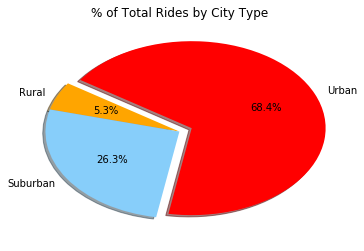

In [8]:
# Calculate Ride Percents
urban_rides_count = urban_cities.groupby(["type"]).count()["ride_id"]
suburban_rides_count = suburban_cities.groupby(["type"]).count()["ride_id"]
rural_rides_count = rural_cities.groupby(["type"]).count()["ride_id"]
total_rides_by_type = urban_rides_count.values[0] + suburban_rides_count.values[0] + rural_rides_count.values[0]
#print(urban_rides_count/total_rides_by_type)

# Build Pie Chart
labels = ["Urban",  "Rural","Suburban",]

# The values of each section of the pie chart
sizes = [urban_rides_count, rural_rides_count, suburban_rides_count]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=260)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("../Images/PyPies2.png")

In [9]:
# Show Figure
plt.show()

## Total Drivers by City Type

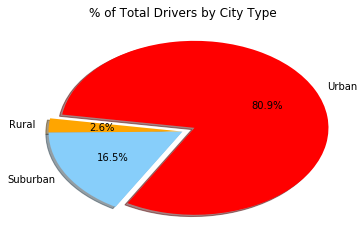

In [10]:
# Calculate Driver Percents
total_drivers_count = city_data.groupby(["type"]).sum()["driver_count"]
urban_drivers_count = total_drivers_count.values[2]
suburban_drivers_count = total_drivers_count.values[1]
rural_drivers_count = total_drivers_count.values[0]

# Build Pie Chart
labels = ["Urban",  "Rural","Suburban",]

# The values of each section of the pie chart
sizes = [urban_drivers_count, rural_drivers_count, suburban_drivers_count]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("../Images/PyPies3.png")

In [11]:
# Show Figure
plt.show()